``` c
header: 
  seq: 2374
  stamp: 
    secs: 1674830086
    nsecs: 353587159
  frame_id: "laser"
angle_min: -3.14159274101
angle_max: 3.14159274101
angle_increment: 0.0140563426539
time_increment: 0.00021908475901
scan_time: 0.0979308858514
range_min: 0.300000011921
range_max: 100.0
ranges: [7.1479997634887695, 7.1479997634887695, 7.1479997634887695, 7.131999969482422, ...]
intensities: [44.0, 53.0, 97.0, 169.0, ...]
---
```

In [1]:
import os
print(os.getcwd())

import numpy as np
 
# using genfromtxt()
ranges_data = np.genfromtxt("explain1.txt", delimiter=",", dtype=float)
display(ranges_data)

/home/he/catkin_ws/src/megoldas_zala23/etc


array([ 7.14799976,  7.14799976,  7.14799976,  7.13199997,  7.13100004,
        7.13100004,  7.13100004,  7.14699984,  7.14799976,  6.17999983,
        6.1960001 ,  6.21099997,  6.21099997,  6.02400017,  4.77799988,
        4.38899994,  4.09399986,  3.8440001 ,  3.61100006,  3.37700009,
        3.19099998,  3.01900005,  2.84800005,  2.73600006,  2.6400001 ,
        2.6400001 ,  2.43600011,  2.31200004,  2.23399997,  2.15700006,
        2.15700006,  2.1730001 ,  2.18700004,  1.89300001,  1.84599996,
        1.79999995,  1.76900005,  1.73800004,  1.69099998,  1.64499998,
        1.61399996,  1.56700003,  1.53600001,  1.505     ,  1.47500002,
        1.42799997,  1.39699996,  1.38100004,  1.35000002,  1.32000005,
        1.30400002,  1.28900003,  1.25699997,  1.24199998,  1.22599995,
        1.24199998,  1.25699997,  1.273     ,  1.28900003,  1.30400002,
        1.32000005,  1.35000002,  1.36600006,  1.39699996,  1.41199994,
        1.44400001,  1.45899999,  1.49000001,  1.505     ,  1.53

448


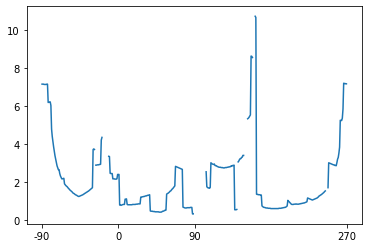

In [2]:
hossz = len(ranges_data)
print(hossz)

import matplotlib.pyplot as plt

plt.plot(ranges_data)
plt.xticks([0, hossz/4, hossz/2, hossz], ['-90', '0',  '90', '270'])
plt.show()


In [3]:
import math
ANGLE_RANGE = 360 # LSN10 LIDAR has 360 degrees scan

def getRange(data, angle):
    # data: single message from topic /scan
    # angle: between -180 to 180 degrees, where 0 degrees is directly to the right
    # Outputs length in meters to object with angle in lidar scan field of view
    if angle > 269.9:
        angle = 269.9
    index = len(data) * (angle + 90) / ANGLE_RANGE
    dist = data[int(index)]
    if math.isinf(dist):
        return 10.0
    if math.isnan(dist):
        return 4.0
    return data[int(index)]

In [4]:
a1 =  getRange(ranges_data,270)
print(a1)

7.164000034332275
